# Week 3: Day 3 – Numerical Programming and Exploratory Data Analysis

## Data Cleaning
Data cleaning is the process of correcting and removing inaccurate records from a dataset, table, or database. it also refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse the data.

In [ ]:
from PIL import Image
import numpy as np
from IPython.display import display

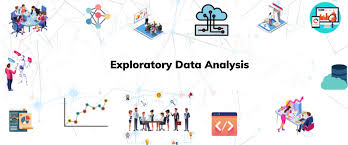

In [ ]:
im=Image.open('eda.jpg')
display(im)
array=np.array

In [ ]:
# Loading the necessary libraries to read the dataset
import numpy as np
import pandas as pd


### Isnull()
isnull() ia a functin that detect missing values for an array-like object.

In [ ]:
# .isnull returns any missing value in an array
# This function takes a scalar or array-like object and indicates whether values are missing.
pd.isnull(np.nan)

True

In [ ]:
# This function takes a scalar or array-like object and indicates whether values are missing ( 'None' in object arrays). 
pd.isnull(None)

True

In [ ]:
# This function takes a scalar or array-like object and indicates whether values are missing ('NaN' in object arrays).
pd.isna(np.nan)

True

In [ ]:
# isna() is used to detect the missing values in the cells of the pandas dataframe.
pd.isna(None)

True

### Notnull() is opposite of it
notnull() detect non-missing values for an array-like object.

In [ ]:
#This function takes a scalar or array-like object and indicates whether values are valid (not missing None in object array)
pd.notnull(None)

False

In [ ]:
#This function takes a scalar or array-like object and indicates whether values are valid (not missing NaN in object array)
pd.notnull(np.nan)

False

In [ ]:
#This function takes a scalar or array-like object and indicates whether values are valid (not missing, which is NaN in numeric array in object array)
pd.notnull(3)

True

### Function Works With Series and DataFrame
they both return a bool, isnull dectect value in series, and also in dataframe

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


### PANDAS OPERATING WITH MISSING VALUES

In [ ]:
# . count() it counts the values of none missing values
pd.Series([1, 2, np.nan]).count()

2

In [ ]:
#.sum() sum up the values of none missing values
pd.Series([1, 2, np.nan]).sum()

3.0

In [ ]:
# . mean retuns the mean value of the none missing values
pd.Series([2, 2, np.nan]).mean()

2.0

# FILTERING MISSING DATA
With numpy we can conbime boolean selection + pd.isnull to filter out those nan s and null values:

In [ ]:
# lets check the array to see the missing and not missing values
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
# lets count the notnull of s
pd.notnull(s).count()

6

In [ ]:
# sum the not missing values
pd.notnull(s).sum()

4

In [ ]:
#sum the missing values
pd.isnull(s).sum()

2

In [ ]:
# lets comfirm the not missing values
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [ ]:
# both notnull and isnull are method of series and dataframe s, so we could use it that way

In [ ]:
#checking the missing values in s
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

## DROPING NULL VALUES
boolean selection + notnull() seems a bit verbose and repitative, and as we said b4 any repitative task will probably have a metter, more DRY way.in this case we can use the dropna method.

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
# lets drop the missing values
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

## DATAFRAME

In [ ]:
# to creating a dataframe we use the curly brackets 
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110]
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
#.info() function is used to get a concise summary of the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [ ]:
#  .shape returns the elements of the shape tuple give the lengths of the corresponding array dimensions.
df.shape

(4, 4)

In [ ]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [ ]:
# here we will sum up the non missing values
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

the dropna fun will drop the row in which null is present

In [ ]:
#lets drop the missing values
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [ ]:
# droping by axis =1 will drop by columns
df.dropna(axis = 1)

,Column D
0,5
1,8
2,34
3,110


# Any or all drops the row or columns that has at least one null value

In [ ]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30,],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100],
})
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [ ]:
 # drop all rows or columns with missing values
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
 # drop any rows or columns with missing values
df.dropna(how='any')

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


# We can use thersh parameter to indicate a thershold ( a minimun number) of non-null values for the rows/columns to be kept

In [ ]:
#loading our dataframe
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
# drop if the missing values is more 3 in a row
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [ ]:
## drop if the missing values is more 3 in a column
df.dropna(thresh=3, axis = 'columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


# FILLING NULL VALUES
sometimes instead of droppin we might repalce them but depending on ur context and dataset. some times nan can be replace with 0 or mean of the sample or the closest value

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

filling nan wt abitrary value

In [ ]:
#lets fill the na with 0
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [ ]:
# lets fill with the mean of the dataframe
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

# Filling Null With Contigiuous (close) values

In [ ]:
# ffill this method is used to fill null with value close to that null one ie the value above the missing value
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [ ]:
# bfill this method is used to fill null with value close to that null one ie the value below the missing value
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [ ]:
# we can leave null values at the extreames of the Series/DataFrame
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [ ]:
#filling null value on DataFrame
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [ ]:
#we can fil by axis
df.fillna(method='ffill', axis = 0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis = 1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


# CHEACKING IF THERE IS NA
cheaking if series or data contain missing values then it returns true or false

In [ ]:
# creating a new data frame
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25]
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [ ]:
# fillig unique value
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [ ]:
# counting the values in the array
df['Sex'].value_counts()

F    2
?    1
D    1
M    1
Name: Sex, dtype: int64

In [ ]:
# .replace to replace a value
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [ ]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [ ]:
df.replace({
    'Sex': {'D' : 'F',
            'N' : 'M'
           },
    'Age': {290 : 29
           }
}) 

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [ ]:
# > to check values grater than
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [ ]:
# loc to locate a value in a row or column
# here we locate the age grater than 100 and divid it by 10
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [ ]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


## DUPLICATE
duplicated() method helps in analyzing duplicate values only.

In [ ]:
# importing ou libraries for loading and reading data
import numpy as np
import pandas as pd


In [ ]:
# loading our data
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
],  index=[
    'Gerard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth',
])



In [ ]:
ambassadors

Gerard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [ ]:
# It returns a boolean series which is True only for Unique elements.
ambassadors.duplicated()

Gerard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [ ]:
# keep: Controls how to consider duplicate value. It has only three distinct value and default is ‘first’. 
# If ‘first’, it considers first value as unique and rest of the same values as duplicate. 
# If ‘last’, it considers last value as unique and rest of the same values as duplicate. 
ambassadors.duplicated(keep = 'last')

Gerard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [ ]:
# If False, it consider all of the same values as duplicates. 
ambassadors.duplicated(keep = False)

Gerard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [ ]:
# lets drop the values with duplicates
ambassadors.drop_duplicates()

Gerard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep = 'last')

Gerard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep = False)

Gerard Araud          France
Armando Varricchio     Italy
dtype: object

## DUPLICATES IN DATAFRAME

In [ ]:
# craeting a data frame
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'Lebron James',
         'Kobe Bryant',
        'Carmelo Anthony',
         'Kobe Bryant',
    ],
    'Pos' :[
        'SG', 
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [ ]:
players

,Name,Pos
0,Kobe Bryant,SG
1,Lebron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
# check for duplicate values
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
players.duplicated(subset =['Name'], keep = 'last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
# drop duplicate values
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,Lebron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
# drops names with duplicate
players.drop_duplicates(subset =['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,Lebron James,SF
3,Carmelo Anthony,SF


In [ ]:
players.drop_duplicates(subset =['Name'], keep = 'last')

,Name,Pos
1,Lebron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
# loading dataframe
df = pd.DataFrame({
    'Data' :[
    '1987_M_US _1',
    '1990?_M_US_1',
    '1992_F_US_2',
    '1970_M_    IT_1',
    '1985_F_I  T_2'
]})

In [ ]:
df

,Data
0,1987_M_US _1
1,1990?_M_US_1
2,1992_F_US_2
3,1970_M_ IT_1
4,1985_F_I T_2


In [ ]:
# The split() method splits a string into a list. You can specify the separator, default separator is any whitespace.
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, US, 1]
2        [1992, F, US, 2]
3    [1970, M,     IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [ ]:
# .info sumarize your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [ ]:
df['Data'].str.split('_', expand = True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,US,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [ ]:
df = df['Data'].str.split('_', expand = True)

In [ ]:
# .columns assiging names to columns
df.columns = ['Year', 'Sex', 'Country', 'No Children']

# We Can Cheack Which Column Contain A Given Value

In [ ]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,US,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [ ]:
# .contains() function is used to test if pattern or regex is contained within a string of a Series or Index. 
df['Year'].str.contains('/?')

0    True
1    True
2    True
3    True
4    True
Name: Year, dtype: bool

In [ ]:
df['Year'].str.contains('U')

0    False
1    False
2    False
3    False
4    False
Name: Year, dtype: bool

In [ ]:
# The split() method splits a string
df['Year'].str.strip('/?')

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [ ]:
df['Country'].str.replace(' ',  '')

0    US
1    US
2    US
3    IT
4    IT
Name: Country, dtype: object

In [ ]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group ('year'))

<ipython-input-93-20bbe2c61cb3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group ('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

## Introduction to Data Analysis With Python
exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

In [ ]:
# importing data set
import pandas as pd
df = pd.read_csv("C:\\Users\\Zachary_B\\Desktop\\dataset\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# .columns returns all the columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# .lower changes ur string to lower case
df.columns.str.lower()

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
# remane allows one to rename the column name
df.rename(columns= {'PassengerId' : 'Passenger_Id', 'Pclass' : 'P_class', 'Name' : 'Full_Name'} )

,Passenger_Id,Survived,P_class,Full_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.rename(columns= {'PassengerId' : 'Passenger_Id', 'Pclass' : 'P_class',  'Name' : 'Full_Name'}, inplace =True)

In [ ]:
df.Full_Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Full_Name, Length: 891, dtype: object

In [ ]:
df.Full_Name.str.split(" ")

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Full_Name, Length: 891, dtype: object

In [ ]:
df.Full_Name.str.split(" ").str.get(0)

0         Braund,
1        Cumings,
2      Heikkinen,
3       Futrelle,
4          Allen,
          ...    
886     Montvila,
887       Graham,
888     Johnston,
889         Behr,
890       Dooley,
Name: Full_Name, Length: 891, dtype: object

In [ ]:
# .get get a secific element in your data
df['Full_Name'] = df.Full_Name.str.split(" ").str.get(0)

In [ ]:
df['Full_Name'].str.split(" ").str.get(4)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Full_Name, Length: 891, dtype: float64

## Data Analysis With Python Example A

In [ ]:
# Loading the necessary labraries to load and read the dataset
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# loading the data set and read the csv into python.
data=pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\StudentsPerformance.csv')

In [ ]:
# .head() returns the 1st 5 columns in our data set
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# .tail() returns the last 5 columns in our data set
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# the shape tells us how many roles and how many columns we have
data.shape

(1000, 8)

In [ ]:
# The describe() method computes and displays summary statistics for a Python dataframe.
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# .columns returns all the column names
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# The nunique() method returns the number of unique values for each column.
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
# lets check the unique value by specifying the gender column axis.
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# .corr() checks data relationship,the corr() method is used to find the pairwise correlation of all columns in the dataframe.
core=data.corr()

<AxesSubplot:>

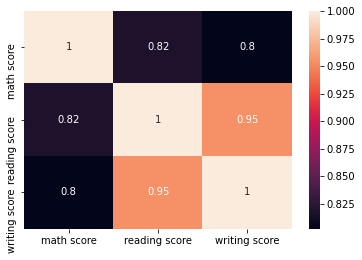

In [ ]:
# lets create a heatmap with the corr of this data set, using the corrolation of the columns as the x and y ticks label
sns.heatmap(core, xticklabels=core.columns, yticklabels=core.columns, annot=True)

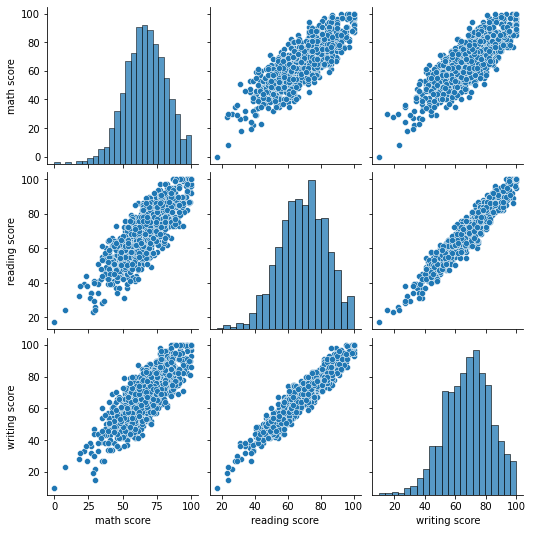

In [ ]:
# lets use the pair plot to plot multiple pairwise bivariate distributions in our dataset
sns.pairplot(data)

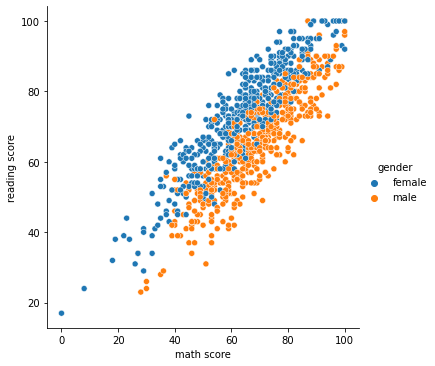

In [ ]:
# This function provides access to several different axes-level 
# using the hue this function show the relationship between two (gender) variables with semantic mappings of subsets. 
sns.relplot(x= 'math score', y='reading score', hue='gender', data=data)

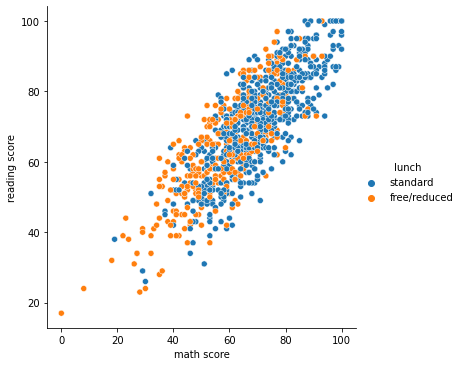

In [ ]:
# using the hue this function show the relationship between two (lunch) variables with semantic mappings of subsets.
sns.relplot(x= 'math score', y='reading score', hue='lunch', data=data)

C:\Users\Zachary_B\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

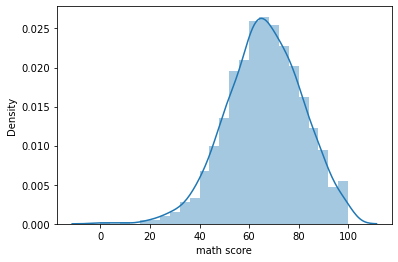

In [ ]:
# A distplot plots a univariate distribution of observations. The distplot() function combines
# the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.
sns.distplot(data['math score'])

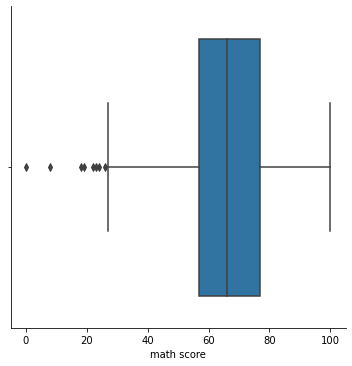

In [ ]:
# This function provides access to several axes-level functions that show the relationship between a numerical and one or
# more categorical variables using one of several visual representations.
sns.catplot(x='math score', kind='box', data=data)

## Data Analysis With Python Example B

In [ ]:
# creating a list of series
import pandas as pd
Series1 = pd.Series([1,2,3,4,5],index =['a','b','c','d','e'])
print ("Example 1:Retrieve the first element")
print (Series1[0] )
print ("\nExample 2:Retrieve the first three element")
print (Series1[:3])
print ("\nExample 3:Retrieve the last three element")
print(Series1[-3:])
print ("\nExample 4:Retrieve a single element")
print (Series1['a'])
print ("\nExample 5:Retrieve multiple elements")
print (Series1[['a','c','d']])

Example 1:Retrieve the first element
1

Example 2:Retrieve the first three element
a    1
b    2
c    3
dtype: int64

Example 3:Retrieve the last three element
c    3
d    4
e    5
dtype: int64

Example 4:Retrieve a single element
1

Example 5:Retrieve multiple elements
a    1
c    3
d    4
dtype: int64


In [ ]:
Series1 = pd.Series(7, index=[0, 1, 2, 3, 4])
print (Series1)

0    7
1    7
2    7
3    7
4    7
dtype: int64


In [ ]:
# assigning vales to each key
data = {'X' : 0., 'Y' : 1., 'Z' : 2.}
SERIES1 = pd.Series(data)
print (SERIES1)

X    0.0
Y    1.0
Z    2.0
dtype: float64


In [ ]:
#find mean value in a series
#find max value in a series
#find min value in a series
# find standard deviation
    
my_series1 = pd.Series([5, 6, 7, 8, 9, 10])
print ("my_series1\n", my_series1)
print ("\n Series Analysis\n ")
print ("Series mean value : ", my_series1.mean()) 

print ("Series max value : ",my_series1.max()) 

print ("Series min value : ",my_series1.min()) 

print ("Series standard deviation value : ",
my_series1.std())
my_series1

my_series1
 0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

 Series Analysis
 
Series mean value :  7.5
Series max value :  10
Series min value :  5
Series standard deviation value :  1.8708286933869707


0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [ ]:
# importing the matplotlib library to plot a graph
import matplotlib.pyplot as plt

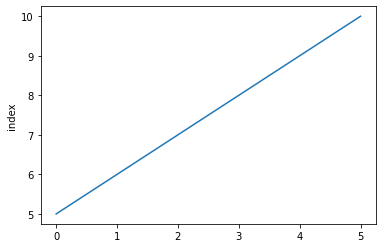

In [ ]:
# plotting a graph of our series using the index as ou ylable
plt.plot(my_series1)
plt.ylabel('index')
plt.show()

In [ ]:
# random.randn() returns the redom values in your series
my_series2 = np.random.randn(5, 10)
print ("\nmy_series2\n", my_series2)


my_series2
 [[-1.79172874  0.1347742   0.85976983  0.72265889 -0.52458294 -0.02787246
   0.31168867 -1.39254315  0.69967948 -1.5483258 ]
 [ 1.09971577 -0.75993886 -0.31927255 -1.04190971 -1.11779575 -0.924814
   0.32254809 -0.66586625  1.51522348 -1.48984491]
 [-0.32000975  2.09222869 -0.43552868 -0.68225538 -0.12141722  0.04902177
  -0.43734094 -0.58074662 -0.63399588  0.54727057]
 [ 0.1417302   0.74068614  1.42985528  0.59430707 -1.55995094 -1.24776842
   1.29463258  0.84220886 -0.22292225  1.02392583]
 [ 1.1565592  -2.33521366 -0.42012094 -0.16835858 -0.39982818  0.50263995
   0.61609996 -1.01879311  0.79521931 -2.03821055]]


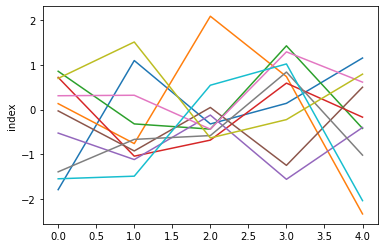

In [ ]:
# lets plot a graph of my_series2
plt.plot(my_series2)
plt.ylabel('index')
plt.show()

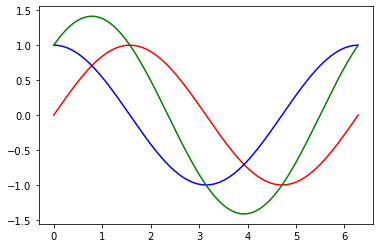

In [ ]:
# loading libraries to load and plot graph 
from numpy import *
import math
import matplotlib.pyplot as plt
t = linspace(0, 2*math.pi, 400)
a = sin(t)
b = cos(t)
c = a + b
plt.plot(t, a, 'r') # plotting t, a separately
plt.plot(t, b, 'b') # plotting t, b separately
plt.plot(t, c, 'g') # plotting t, c separately
plt.show()

In [ ]:
t

array([0.        , 0.01574733, 0.03149466, 0.04724199, 0.06298933,
       0.07873666, 0.09448399, 0.11023132, 0.12597865, 0.14172598,
       0.15747332, 0.17322065, 0.18896798, 0.20471531, 0.22046264,
       0.23620997, 0.25195731, 0.26770464, 0.28345197, 0.2991993 ,
       0.31494663, 0.33069396, 0.3464413 , 0.36218863, 0.37793596,
       0.39368329, 0.40943062, 0.42517795, 0.44092528, 0.45667262,
       0.47241995, 0.48816728, 0.50391461, 0.51966194, 0.53540927,
       0.55115661, 0.56690394, 0.58265127, 0.5983986 , 0.61414593,
       0.62989326, 0.6456406 , 0.66138793, 0.67713526, 0.69288259,
       0.70862992, 0.72437725, 0.74012459, 0.75587192, 0.77161925,
       0.78736658, 0.80311391, 0.81886124, 0.83460857, 0.85035591,
       0.86610324, 0.88185057, 0.8975979 , 0.91334523, 0.92909256,
       0.9448399 , 0.96058723, 0.97633456, 0.99208189, 1.00782922,
       1.02357655, 1.03932389, 1.05507122, 1.07081855, 1.08656588,
       1.10231321, 1.11806054, 1.13380787, 1.14955521, 1.16530

## DataFrame

In [ ]:
# creating a dataframe
import pandas as pd
data = [['Ossama',25],['Ali',43],['Ziad',32]]
DF1 = pd.DataFrame(data,columns=['Name','Age'])
print (DF1)

     Name  Age
0  Ossama   25
1     Ali   43
2    Ziad   32


In [ ]:
data = {'Test1' : pd.Series([70, 55, 89],
  index=['Ahmed', 'Omar', 'Ali']),
 'Test2' : pd.Series([56, 82, 77, 65],
index=['Ahmed', 'Omar', 'Ali', 'Salwa'])}
df1 = pd.DataFrame(data)
df1['Project'] = pd.Series([90,83,67, 87],index=
['Ali','Omar','Salwa', 'Ahmed'])
print ("\n")
df1['Average'] = round((df1['Test1']+df1['Test2']+df1
['Project'])/3, 2)
print (df1)
print ("\nselect iloc function to retrieve row number 2")
print (df1.iloc[2])
print ("\nslice rows")
print (df1[2:4] )



       Test1  Test2  Project  Average
Ahmed   70.0     56       87    71.00
Ali     89.0     77       90    85.33
Omar    55.0     82       83    73.33
Salwa    NaN     65       67      NaN

select iloc function to retrieve row number 2
Test1      55.00
Test2      82.00
Project    83.00
Average    73.33
Name: Omar, dtype: float64

slice rows
       Test1  Test2  Project  Average
Omar    55.0     82       83    73.33
Salwa    NaN     65       67      NaN


In [ ]:
Number = [1,2,3,4,5,6,7,8,9,10]
Names = ['Ali Ahmed','Mohamed Ziad','Majid Salim','Salwa Ahmed', 'Ahlam Mohamed', 'Omar Ali', 'Amna Mohammed\n',
         'Khalid Yousif', 'Safa Humaid', 'Amjad Tayel']
City = ['Fujairah','Dubai','Sharjah','AbuDhabi','Fujairah','Dubai', 'Sharja ', 'AbuDhabi','Sharjah','Fujairah']
columns = ['Number', 'Name', 'City' ]
dataset= pd.DataFrame({'Number': Number , 'Name': Names,
'City': City}, columns = columns )
Gender= pd.DataFrame({'Gender':['Male','Male','Male','Female',
'Female', 'Male', 'Female', 'Male','Female', 'Male']})
Height = pd.DataFrame(np.random.randint(120,175, size=(12, 1)))
Weight = pd.DataFrame(np.random.randint(50,110, size=(12, 1)))
dataset['Gender']= Gender
dataset['Height']= Height
dataset['Weight']= Weight
dataset.set_index('Number')

,Name,City,Gender,Height,Weight
Number,,,,,
1,Ali Ahmed,Fujairah,Male,123,63
2,Mohamed Ziad,Dubai,Male,141,74
3,Majid Salim,Sharjah,Male,144,105
4,Salwa Ahmed,AbuDhabi,Female,137,78
5,Ahlam Mohamed,Fujairah,Female,167,77
6,Omar Ali,Dubai,Male,170,60
7,Amna Mohammed\n,Sharja,Female,150,73
8,Khalid Yousif,AbuDhabi,Male,157,96
9,Safa Humaid,Sharjah,Female,150,54


In [ ]:
#groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. 
dataset.groupby('City')['Gender'].count()

City
AbuDhabi    2
Dubai       2
Fujairah    3
Sharja      1
Sharjah     2
Name: Gender, dtype: int64

In [ ]:
# the group() method is use to extract each group result separately by specifying a group index in between parentheses.
print (dataset.groupby('City').groups)

{'AbuDhabi': [3, 7], 'Dubai': [1, 5], 'Fujairah': [0, 4, 9], 'Sharja ': [6], 'Sharjah': [2, 8]}


In [ ]:
grouped = dataset.groupby('Gender')
for name,group in grouped:
    print (name)
    print (group)
    print ("\n")

Female
   Number             Name      City  Gender  Height  Weight
3       4      Salwa Ahmed  AbuDhabi  Female     137      78
4       5    Ahlam Mohamed  Fujairah  Female     167      77
6       7  Amna Mohammed\n   Sharja   Female     150      73
8       9      Safa Humaid   Sharjah  Female     150      54


Male
   Number           Name      City Gender  Height  Weight
0       1      Ali Ahmed  Fujairah   Male     123      63
1       2   Mohamed Ziad     Dubai   Male     141      74
2       3    Majid Salim   Sharjah   Male     144     105
5       6       Omar Ali     Dubai   Male     170      60
7       8  Khalid Yousif  AbuDhabi   Male     157      96
9      10    Amjad Tayel  Fujairah   Male     163      89




In [ ]:
# Aggregation
grouped = dataset.groupby('Gender')
print (grouped['Height'].agg(np.mean))
print ("\n")
print (grouped['Weight'].agg(np.mean))
print ("\n")
print (grouped.agg(np.size))
print ("\n")
print (grouped['Height'].agg([np.sum, np.mean,
np.std]))

Gender
Female    151.000000
Male      149.666667
Name: Height, dtype: float64


Gender
Female    70.500000
Male      81.166667
Name: Weight, dtype: float64


        Number  Name  City  Height  Weight
Gender                                    
Female       4     4     4       4       4
Male         6     6     6       6       6


        sum        mean        std
Gender                            
Female  604  151.000000  12.301761
Male    898  149.666667  17.107503


In [ ]:
#TRANSFORMATION
dataset = dataset.set_index(['Number'])
print (dataset)

                   Name      City  Gender  Height  Weight
Number                                                   
1             Ali Ahmed  Fujairah    Male     123      63
2          Mohamed Ziad     Dubai    Male     141      74
3           Majid Salim   Sharjah    Male     144     105
4           Salwa Ahmed  AbuDhabi  Female     137      78
5         Ahlam Mohamed  Fujairah  Female     167      77
6              Omar Ali     Dubai    Male     170      60
7       Amna Mohammed\n   Sharja   Female     150      73
8         Khalid Yousif  AbuDhabi    Male     157      96
9           Safa Humaid   Sharjah  Female     150      54
10          Amjad Tayel  Fujairah    Male     163      89


In [ ]:
grouped = dataset.groupby('Gender')
score = lambda x: (x - x.mean()) / x.std()*10
print (grouped.transform(score))

           Height     Weight
Number                      
1      -15.587702  -9.914172
2       -5.066003  -3.911095
3       -3.312387  13.006666
4      -11.380484   6.690387
5       13.006268   5.798335
6       11.885623 -11.551375
7       -0.812892   2.230129
8        4.286618   8.095058
9       -0.812892 -14.718851
10       7.793851   4.274918


In [ ]:
print (dataset.groupby('City').filter(lambda x: len(x)>= 3))

                 Name      City  Gender  Height  Weight
Number                                                 
1           Ali Ahmed  Fujairah    Male     123      63
5       Ahlam Mohamed  Fujairah  Female     167      77
10        Amjad Tayel  Fujairah    Male     163      89


In [ ]:
i=1
while i<6:
    i+=1
    if i==3:
        break
    print('Three is my limit')

Three is my limit
